¡ Hola Sharon! Como te va?



 Mi nombre es Facundo Lozano! Ya he tenido el agrado de revisar otros proyectos tuyos, nuevamente seré tu revisor en este proyecto.



Como siempre, a continuación un poco sobre la modalidad de revisión que usaremos:



 Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.



 Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.



 Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:



 <div class="alert alert-block alert-success">

 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Exito. Todo se ha hecho de forma exitosa.

 </div>



 <div class="alert alert-block alert-warning">

 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Observación. Algunas recomendaciones.

 </div>



 <div class="alert alert-block alert-danger">



 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos.

 </div>



 Puedes responder utilizando esto:



 <div class="alert alert-block alert-info">

 <b>Respuesta de estudiante.</b> <a class="tocSkip"></a>

 </div>

# Descripción del proyecto

Good Seed le gustaría explorar si la ciencia de los datos puede ayudarle a cumplir con las leyes sobre el alcohol, al asegurarse de no vender alcohol a personas menores de edad. Tener en cuenta lo siguiente:

- Las tiendas están equipadas con cámaras en el área de pago, las cuales se activan cuando una persona está comprando alcohol.

- Los métodos de visión artificial se pueden usar para determinar la edad de una persona a partir de una foto.

- La tarea, entonces, es construir y evaluar un modelo para verificar la edad de las personas.

Para empezar a trabajar en la tarea, tendrás un conjunto de fotografías de personas que indican su edad.

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Sharon, siempre me tomo este tiempo al inicio del proyecto para comentar mis apreciaciones generales de esta primera iteración de la entrega. 

Siempre me gusta comenzar dando la bienvenida al mundo de los datos a los estudiantes, te deseo lo mejor y espero que consigas lograr tus objetivos. Personalmente siempre me gusta brindar el siguiente consejo, "Está bien equivocarse, es normal y es lo mejor que te puede pasar. Aprendemos de los errores y eso te hará mejor programadora ya que podrás descubrir cosas a medida que avances y son estas cosas las que te darán esa experiencia para ser una gran cientifica de datos."
    
Ahora si yendo a esta notebook. Sharon, lo he dicho al final del proyecto pero lo resalto aquí nuevamente, tu proyecto está muy bien resuelto, resalta capacidad y comprensión de todas las herrramientas, como a la vez esta ordenado y es sencillo de seguir, felictiaciones!

Este proyecto está en condiciones de ser aprobado! Éxitos dentro de tu camino en el mundo de los datos!

Saludos Sharon!

## Inicialización

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/` 
- La carpeta `final_files` con 7600 fotos 
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age` 
Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

train_datagen = ImageDataGenerator(rescale=1./255)

train_gen_flow = train_datagen.flow_from_dataframe(
            dataframe=labels,
            directory='/datasets/faces/final_files/',
            x_col='file_name',
            y_col='real_age',
            target_size=(224, 224),
            batch_size=32,
            class_mode='raw',
            seed=12345)

Found 7591 validated image filenames.


In [3]:
features, target = next(train_gen_flow)

In [4]:
features.shape

(32, 224, 224, 3)

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Hasta aquí excelente Sharon, una importación de librerías perfecta por separado de la carga de los datos y a la vez excelente implementación de métodos para observar la composición de los datos como asi el ImageDataGenerator! Bien hecho!

Esto representa un tensor con 32 imagenes en cada batch, donde cada una tiene 224 pixeles de alto y 224 de ancho, y las imagenes tienen tres canales de color(RGB).

## EDA

In [5]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [6]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [7]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


<AxesSubplot:>

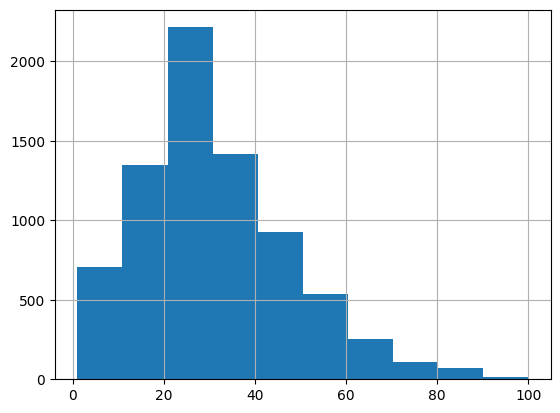

In [8]:
#histograma de la edad
labels['real_age'].hist()

Se observa que gran parte de las fotos de la carpeta son menores de 50 años, desde esa edad hasta los 100 años disminuye.

<AxesSubplot:>

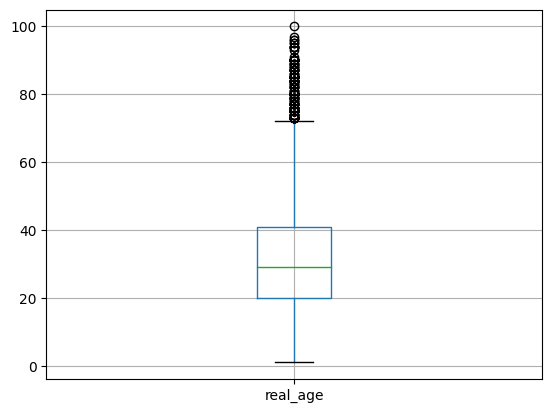

In [9]:
labels.boxplot(column='real_age')

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Bien hecho Sharon! Tal como debiamos hemos profundizado sobre la distribución de las edades de nuestros datos, excelente implementación tanto de el histograma y el boxplot!

En el gráfico de caja se observa una media de 30 años, la mayoria de valores atípicos van desde los 70 años hacia delante.

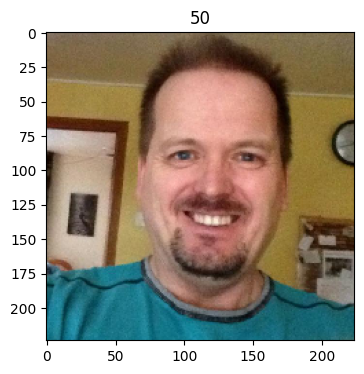

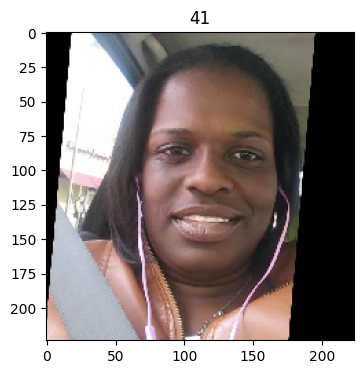

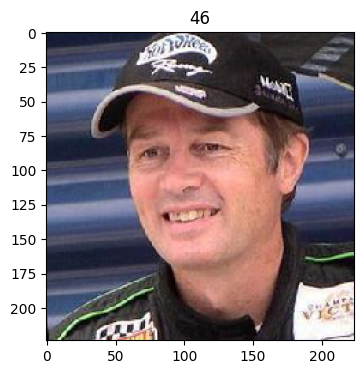

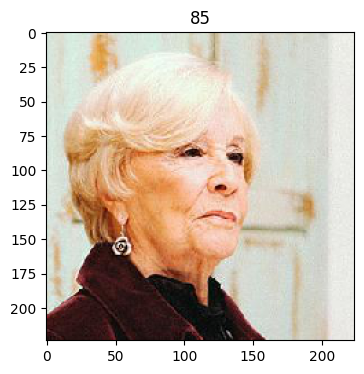

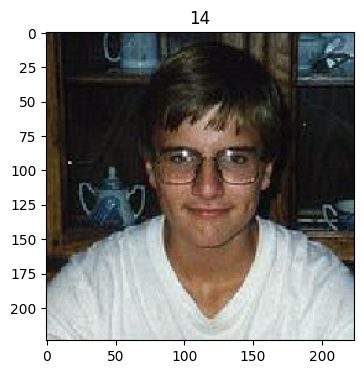

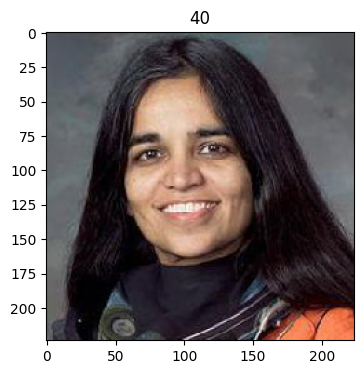

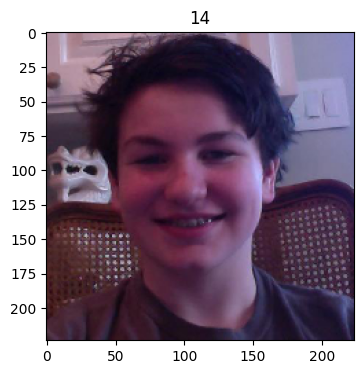

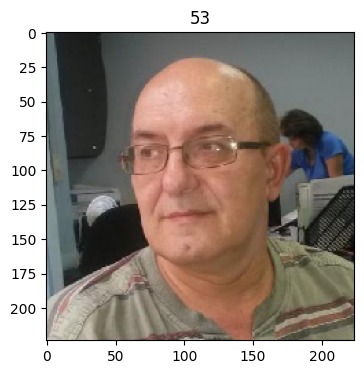

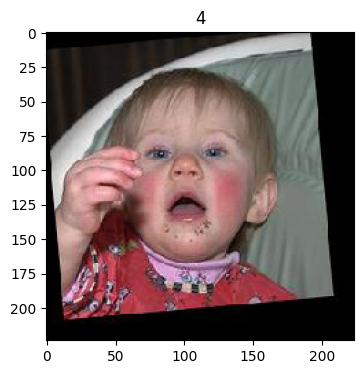

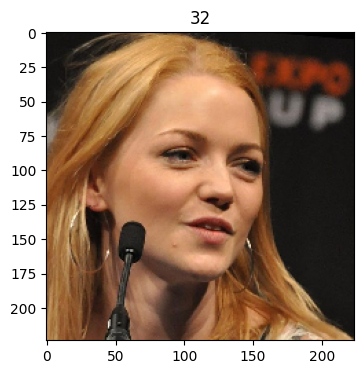

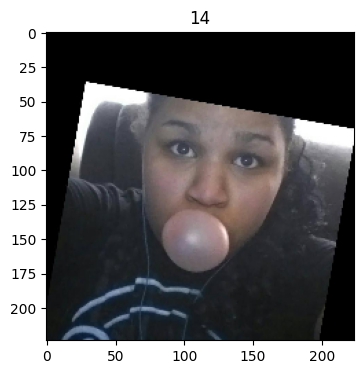

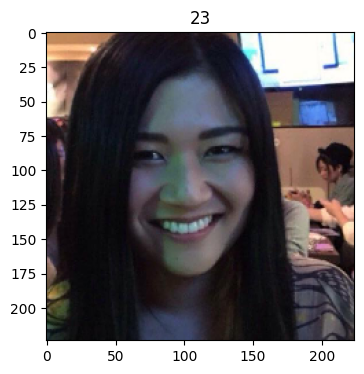

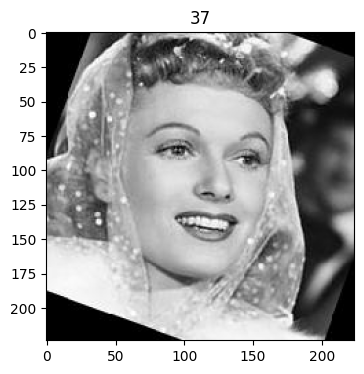

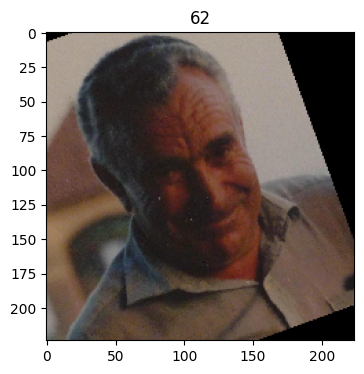

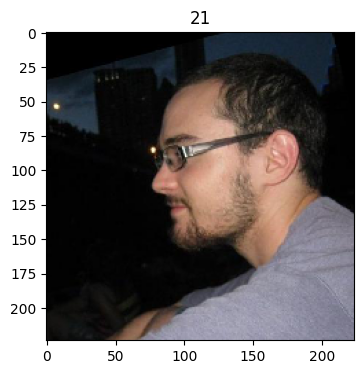

In [10]:
# Se muestra las fotografías
for img, age in zip(features[:15], target[:15]):
    plt.figure(figsize=(4,4))
    plt.title(age)
    plt.imshow(img)

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente implementación de código para la visualización de las imagenes con las que trabajaremos, sigamos!

### Conclusiones

- Las imágenes presentan 224 x 224 pixeles de ancho y alto con 3 canales de color.

- Los usuarios van desde la edad de 1 hasta 100 años de edad.

- Se observa del diagrama de cajas que el rango interquantil es de 20 a 40 años con una media de 30 años, mientras que los valores atipicos o menos frecuentes en estos datos es desde 75 hasta los 100 años.

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crea un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [11]:
def load_train(path):
    
    """
    Carga la parte de entrenamiento del conjunto de datos desde la ruta.
    """
    labels = pd.read_csv(path + 'labels.csv')

    train_datagen = ImageDataGenerator(validation_split = 0.25, 
                                       rescale=1./255,
                                       horizontal_flip=True, 
                                       vertical_flip = True)

    train_gen_flow = train_datagen.flow_from_dataframe(
            dataframe=labels,
            directory=path + 'final_files/',
            x_col='file_name',
            y_col='real_age',
            target_size=(224, 224),
            batch_size=32,
            class_mode='raw',
            subset='training',
            seed=12345)
    
    return train_gen_flow

In [12]:
def load_test(path):
    
    """
    Carga la parte de validación/prueba del conjunto de datos desde la ruta
    """
    labels = pd.read_csv(path + 'labels.csv')

    test_datagen = ImageDataGenerator(validation_split = 0.25, 
                                       rescale=1./255)

    test_gen_flow = test_datagen.flow_from_dataframe(
            dataframe=labels,
            directory=path + 'final_files/',
            x_col='file_name',
            y_col='real_age',
            target_size=(224, 224),
            batch_size=32,
            class_mode='raw',
            subset='validation',
            seed=12345)

    return test_gen_flow

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Muy buen armadas las funciones Sharon, aquí podríamos probar diferentes valores del lote para observar si hay mejoras de eficiencia en los modelos, pero por otro lado excelente al mantenter los tamaños de entrada iguales. Sigamos!

In [13]:
def create_model(input_shape):
    
    """
    Define el modelo
    """
    backbone = ResNet50(input_shape=input_shape, 
                        weights='imagenet', 
                        include_top=False
                       )

    model = Sequential()
    optimizer=Adam(lr=0.0001)
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(1, activation='relu')) 
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente creación de modelo Sharon, en primera instancia implementando el modelo sugerido Resnet50, y luego creando la estructura del modelo aplicando tanto capas como el optimizador y compilando. Una forma de visualizar mejoras en los modelos es probando diferentes tasas de aprendizaje o la agregación de mayor cantidad de capas.

In [14]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Entrena el modelo dados los parámetros
    """
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Un armado perfecto Sharon, bien hecho! Aquí podríamos agregar al inicio la línea **%%time** para observar el tiempo que demora esta ejecución.

## Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

In [15]:
# prepara un script para ejecutarlo en la plataforma GPU

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### El resultado

De la plataforma GPU se obtiene:

Found 5694 validated image filenames.

Found 1897 validated image filenames.

Train for 178 steps, validate for 60 steps

Epoch 1/20

178/178 - 63s - loss: 258.5710 - mae: 11.7625 - val_loss: 782.0153 - val_mae: 23.0512

Epoch 2/20

178/178 - 40s - loss: 101.5568 - mae: 7.6004 - val_loss: 816.4145 - val_mae: 23.5859

Epoch 3/20

178/178 - 40s - loss: 79.1899 - mae: 6.7554 - val_loss: 262.7116 - val_mae: 11.9103

Epoch 4/20

178/178 - 40s - loss: 63.0287 - mae: 6.0289 - val_loss: 115.0566 - val_mae: 8.1106

Epoch 5/20

178/178 - 40s - loss: 52.6210 - mae: 5.5059 - val_loss: 98.2455 - val_mae: 7.2819

Epoch 6/20

178/178 - 40s - loss: 45.5737 - mae: 5.1280 - val_loss: 85.2391 - val_mae: 7.2146

Epoch 7/20

178/178 - 40s - loss: 38.9060 - mae: 4.7495 - val_loss: 84.9326 - val_mae: 7.0171

Epoch 8/20

178/178 - 40s - loss: 33.4563 - mae: 4.3798 - val_loss: 75.0158 - val_mae: 6.3788

Epoch 9/20

178/178 - 40s - loss: 28.1367 - mae: 4.0666 - val_loss: 70.6220 - val_mae: 6.3774

Epoch 10/20

178/178 - 40s - loss: 26.2991 - mae: 3.9300 - val_loss: 80.4956 - val_mae: 6.8330

Epoch 11/20

178/178 - 40s - loss: 23.3415 - mae: 3.6548 - val_loss: 90.7603 - val_mae: 7.0563

Epoch 12/20

178/178 - 40s - loss: 21.5493 - mae: 3.5459 - val_loss: 74.9516 - val_mae: 6.6231

Epoch 13/20

178/178 - 40s - loss: 18.8913 - mae: 3.3072 - val_loss: 83.6422 - val_mae: 7.1527

Epoch 14/20

178/178 - 40s - loss: 16.6440 - mae: 3.1114 - val_loss: 79.2482 - val_mae: 6.7390

Epoch 15/20

178/178 - 40s - loss: 16.4759 - mae: 3.0912 - val_loss: 68.9259 - val_mae: 6.1828

Epoch 16/20

178/178 - 40s - loss: 14.6493 - mae: 2.9262 - val_loss: 72.8344 - val_mae: 6.3213

Epoch 17/20

178/178 - 40s - loss: 12.5575 - mae: 2.6943 - val_loss: 66.6323 - val_mae: 6.1482

Epoch 18/20

178/178 - 40s - loss: 13.4260 - mae: 2.7701 - val_loss: 67.7823 - val_mae: 6.2156

Epoch 19/20

178/178 - 40s - loss: 12.9790 - mae: 2.7384 - val_loss: 67.9463 - val_mae: 6.2311

Epoch 20/20

178/178 - 40s - loss: 12.2394 - mae: 2.6547 - val_loss: 70.4004 - val_mae: 6.4360


60/60 - 10s - loss: 70.4004 - mae: 6.4360

**Test MAE: 6.4360**

<div class="alert alert-block alert-success">
<b>Comentario del revisocr. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente conclusión Sharon, destaco el rendimiento exitoso del modelo y sobre todo el procedimiento aplicado. El modelo cumple con los criterios establecidos y tus conclusiones demuestran tu comprensión de lo aplicado y obtenido. Felicitaciones!

## Conclusiones

- Se preenta una media de 30 años para el conjunto de imagenes donde las edades varian de 1 a 100. 

- Se obtiene un valor del MAE de 6.4 años en la predicción para el conjunto de validación. Se utilizó un optimizador 'Adam' con una tasa de aprendizaje de 0.0001 y 20 épocas para su entrenamiento.

- La visión artificial será de utilidad para el cliente en su negocio en la sección de venta de alcohol.
 
- El cliente podría utilizar el modelo para identificar las edades de las personas que mas visitan sus tiendas e implentar productos que utilizan los de cierto rango de edad.

# Lista de control

- [ ]  El Notebook estaba abierto 
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución
- [ ]  Se realizó el análisis exploratorio de datos 
- [ ]  Los resultados del análisis exploratorio de datos se presentan en el notebook final 
- [ ]  El valor EAM del modelo no es superior a 8 
- [ ]  El código de entrenamiento del modelo se copió en el notebook final 
- [ ]  El resultado de entrenamiento del modelo se copió en el notebook final 
- [ ] Los hallazgos se proporcionaron con base en los resultados del entrenamiento del modelo